# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on the Wisconsin Breast Cancer dataset.
The figures in this notebook were generated by see-classify with has `34abb8bb0d7a89716c194bcb993e4d92582fb1e9`.

To generate data files, run:
- for sklearn
```bash
sbatch run_generate_gensearch_data.sb -m sklearn -n 10 -p 10
```
- for dhahri
```bash
sbatch run_generate_gensearch_data.sb -m dhahri -n 100 -p 10
```
to generate files for genetic search using 10 generations and population size of 10
for the sklearn tutorial and 100 generations with population size of 10 respectively
for the Breast Cancer Wisconsin (Diagnostic) Dataset.

The `-n` and `-p` flags control number of generations and population sizes
respectively.

Set data file names.

In [1]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
# Set data files path names
slurm_id = 30621493
hof_dataset = f"../dhahri_2019_hof_100_100_{slurm_id}.csv"
population_dataset = f"../dhahri_2019_population_100_100_{slurm_id}.csv"

In [3]:
import pandas as pd
import numpy as np

num_gen = 100
pop_size = 100
num_trials = 30
hof_size = 10

slice_gen = 20  # allows us to plot the range between 0 and a specific generation number

hof_df = pd.read_csv(hof_dataset, header=None, delimiter=";")
population_df = pd.read_csv(population_dataset, header=None, delimiter=";")

# Using a line plot we show how generational fitness average changes
# Using means of means and standard deviation of the sample means

generations = list(range(0, slice_gen + 1))

# trials x generation number
trial_means = np.zeros((num_trials, slice_gen + 1))

for i in range(0, num_trials):
    sample = population_df[
        (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
    ]
    for j in range(0, slice_gen + 1):
        # Get all rows for generation j
        rows = sample[sample[0] == j]
        trial_means[i, j] = rows[2].mean()

means_of_means = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    means_of_means[i] = trial_means[:, i].mean()

std_sample_means = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    std_sample_means[i] = trial_means[:, i].std()

# Using a line plot we show how generational fitness hof changes
# Using means of means and standard deviation of the sample means

generations = list(range(0, slice_gen + 1))

# Trials x generation number
hof_trial_means = np.zeros((num_trials, slice_gen + 1))

for i in range(0, num_trials):
    sample = hof_df[
        (num_gen + 1) * (hof_size) * i : (num_gen + 1) * (hof_size) * (i + 1)
    ]
    for j in range(0, slice_gen + 1):
        # Get all rows for generation j
        rows = sample[sample[0] == j]
        hof_trial_means[i, j] = rows[2].mean()

hof_means_of_means = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    hof_means_of_means[i] = hof_trial_means[:, i].mean()

hof_std_sample_means = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    hof_std_sample_means[i] = hof_trial_means[:, i].std()

# Trials x generation number
hof_trial_mins = np.zeros((num_trials, slice_gen + 1))

for i in range(0, num_trials):
    sample = population_df[
        (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
    ]
    for j in range(0, slice_gen + 1):
        # Get all rows for generation j
        rows = sample[sample[0] == j]
        hof_trial_mins[i, j] = rows[2].min()

hof_means_of_mins = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    hof_means_of_mins[i] = hof_trial_mins[:, i].mean()

hof_std_of_mins = np.zeros(slice_gen + 1)
for i in range(slice_gen + 1):
    hof_std_of_mins[i] = hof_trial_mins[:, i].std()

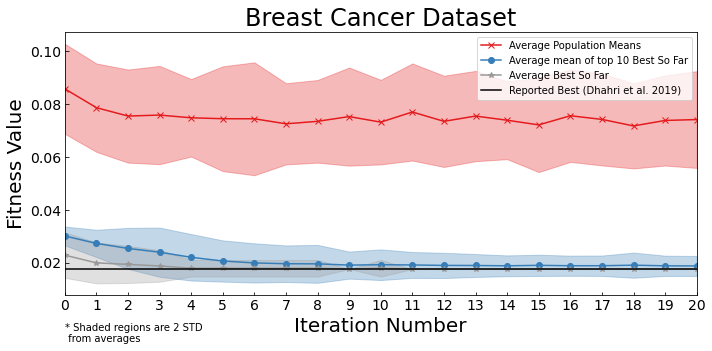

In [4]:
# Plot data
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, sharex=True, figsize=(10, 5))

alpha = 0.3

blue = "#377eb8"
red = "#e41a1c"
gray = "#999999"

axs.plot(generations, means_of_means, "x-", color=red, label="Average Population Means")
axs.fill_between(
    generations,
    means_of_means - 2 * std_sample_means,
    means_of_means + 2 * std_sample_means,
    alpha=alpha,
    color=red,
)

axs.plot(
    generations,
    hof_means_of_means,
    "o-",
    color=blue,
    label="Average mean of top 10 Best So Far",
)
axs.fill_between(
    generations,
    hof_means_of_means - 2 * hof_std_sample_means,
    hof_means_of_means + 2 * hof_std_sample_means,
    alpha=alpha,
    color=blue,
)

axs.plot(generations, hof_means_of_mins, "*-", color=gray, label="Average Best So Far")
axs.fill_between(
    generations,
    hof_means_of_mins - 2 * hof_std_of_mins,
    hof_means_of_mins + 2 * hof_std_of_mins,
    alpha=alpha,
    color=gray,
)

axs.plot(
    generations,
    np.repeat(1 - 0.9824, slice_gen + 1),
    "k-",
    label="Reported Best (Dhahri et al. 2019)",
)

axs.legend(loc="best")

plt.xlim(0, 10)

plt.tick_params(which="both", direction="in", labelsize=14)

axs.set_title("Breast Cancer Dataset", fontdict={'fontsize': 24})
axs.set_xlabel("Iteration Number", fontdict={'fontsize': 20})
axs.set_ylabel("Fitness Value", fontdict={'fontsize': 20})

axs.set_xticks(list(range(21)))

plt.text(0, -0.01, "* Shaded regions are 2 STD\n from averages")
plt.tight_layout()

In [1]:
# Set data filenames for populations of 25, 50, 75, 100 in an array
# in increasing order.
slurm_id_0 = 30810633
slurm_id_1 = 30810634
slurm_id_2 = 30810637
slurm_id_3 = 30621493

hof_datasets = [
    f"../dhahri_2019_hof_100_25_{slurm_id_0}.csv",
    f"../dhahri_2019_hof_100_50_{slurm_id_1}.csv",
    f"../dhahri_2019_hof_100_75_{slurm_id_2}.csv",
    f"../dhahri_2019_hof_100_100_{slurm_id_3}.csv"
]

population_datasets = [
    f"../dhahri_2019_population_100_25_{slurm_id_0}.csv",
    f"../dhahri_2019_population_100_50_{slurm_id_1}.csv",
    f"../dhahri_2019_population_100_75_{slurm_id_2}.csv",
    f"../dhahri_2019_population_100_100_{slurm_id_3}.csv",
]

In [12]:
import pandas as pd
import numpy as np

num_gen = 100
num_trials = 5
hof_size = 10

means_of_means = np.zeros((4, num_gen+1))
std_sample_means = np.zeros((4, num_gen+1))
hof_means_of_means = np.zeros((4, num_gen+1))
hof_std_sample_means = np.zeros((4, num_gen+1))
hof_means_of_mins = np.zeros((4, num_gen+1))
hof_std_of_mins = np.zeros((4, num_gen+1))

for k in range(4):
    pop_size = (k + 1) * 25

    slice_gen = 100  # allows us to plot the range between 0 and a specific generation number

    hof_df = pd.read_csv(hof_datasets[k], header=None, delimiter=";")
    population_df = pd.read_csv(population_datasets[k], header=None, delimiter=";")

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen + 1))

    # trials x generation number
    trial_means = np.zeros((num_trials, slice_gen + 1))

    for i in range(0, num_trials):
        sample = population_df[
            (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
        ]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i, j] = rows[2].mean()

    for i in range(slice_gen + 1):
        means_of_means[k][i] = trial_means[:, i].mean()

    for i in range(slice_gen + 1):
        std_sample_means[k][i] = trial_means[:, i].std()

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen + 1))

    # Trials x generation number
    hof_trial_means = np.zeros((num_trials, slice_gen + 1))

    for i in range(0, num_trials):
        sample = hof_df[
            (num_gen + 1) * (hof_size) * i : (num_gen + 1) * (hof_size) * (i + 1)
        ]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i, j] = rows[2].mean()

    for i in range(slice_gen + 1):
        hof_means_of_means[k][i] = hof_trial_means[:, i].mean()

    for i in range(slice_gen + 1):
        hof_std_sample_means[k][i] = hof_trial_means[:, i].std()

    # Trials x generation number
    hof_trial_mins = np.zeros((num_trials, slice_gen + 1))

    for i in range(0, num_trials):
        sample = population_df[
            (num_gen + 1) * (pop_size) * i : (num_gen + 1) * (pop_size) * (i + 1)
        ]
        for j in range(0, slice_gen + 1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_mins[i, j] = rows[2].min()

    for i in range(slice_gen + 1):
        hof_means_of_mins[k][i] = hof_trial_mins[:, i].mean()

    for i in range(slice_gen + 1):
        hof_std_of_mins[k][i] = hof_trial_mins[:, i].std()

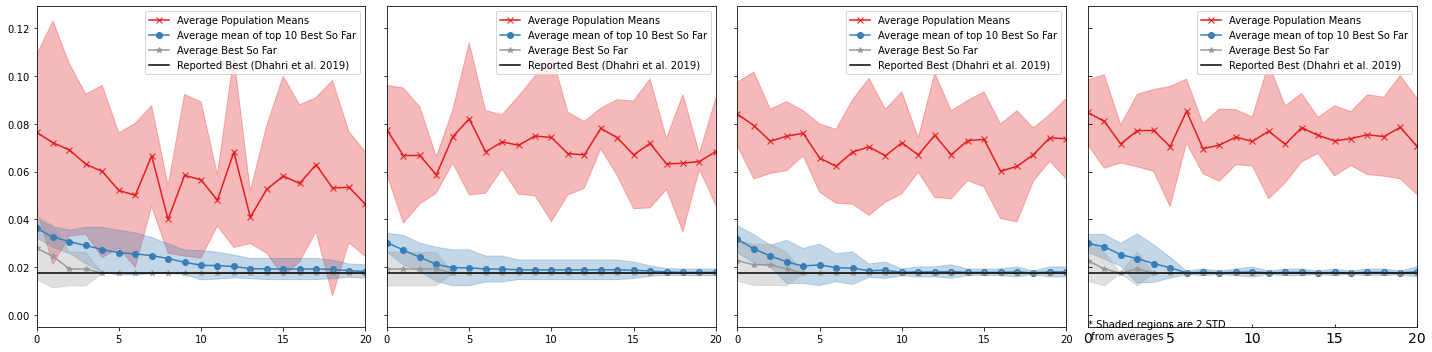

In [13]:
# Plot data
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5))

alpha = 0.3

blue = "#377eb8"
red = "#e41a1c"
gray = "#999999"

for i in range(4):
    axs[i].plot(
        generations,
        means_of_means[i],
        "x-",
        color=red,
        label="Average Population Means",
    )
    axs[i].fill_between(
        generations,
        means_of_means[i] - 2 * std_sample_means[i],
        means_of_means[i] + 2 * std_sample_means[i],
        alpha=alpha,
        color=red,
    )

    axs[i].plot(
        generations,
        hof_means_of_means[i],
        "o-",
        color=blue,
        label="Average mean of top 10 Best So Far",
    )
    axs[i].fill_between(
        generations,
        hof_means_of_means[i] - 2 * hof_std_sample_means[i],
        hof_means_of_means[i] + 2 * hof_std_sample_means[i],
        alpha=alpha,
        color=blue,
    )

    axs[i].plot(
        generations, hof_means_of_mins[i], "*-", color=gray, label="Average Best So Far"
    )
    axs[i].fill_between(
        generations,
        hof_means_of_mins[i] - 2 * hof_std_of_mins[i],
        hof_means_of_mins[i] + 2 * hof_std_of_mins[i],
        alpha=alpha,
        color=gray,
    )

    axs[i].plot(
        generations,
        np.repeat(1 - 0.9824, slice_gen + 1),
        "k-",
        label="Reported Best (Dhahri et al. 2019)",
    )

    axs[i].legend(loc="best")

    plt.tick_params(which="both", direction="in", labelsize=14)

    # axs[i].set_title("Breast Cancer Dataset", fontdict={'fontsize': 24})
    # axs[i].set_xlabel("Iteration Number", fontdict={'fontsize': 20})
    # axs[i].set_ylabel("Fitness Value", fontdict={'fontsize': 20})

    upper_bound = 20
    plt.xlim(0, upper_bound)
    axs[i].set_xticks(np.linspace(0, upper_bound, num=5))

plt.text(0, -0.01, "* Shaded regions are 2 STD\n from averages")
plt.tight_layout()